In [1]:
from scripts.classes import *
from IPython.display import display
import os
os.chdir('..')
print(os.getcwd())

/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0


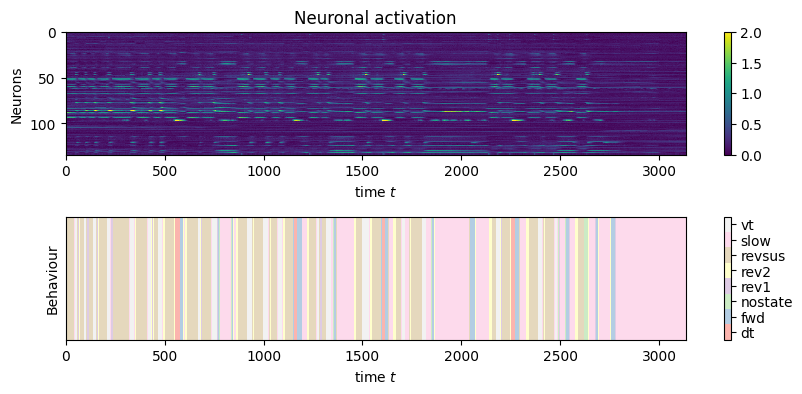

Accuracy: 0.912252712188896
Probability map has shape: (3134, 28)


True

In [2]:
import numpy as np
#Y = np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G'], size=2000, p=[0.05, 0.2, 0.1, 0.25, 0.1, 0.25, 0.05])
#X = np.random.rand(100, len(Y))

#influence_factor = 0.2
# Use the values in Y to introduce structure
#for i, y_value in enumerate(Y):
#    X[:, i] += influence_factor * (ord(y_value) % 7)  # Adjust the expression as needed

l = Loader(1)
data = Database(*l.data)
data.plotting_neuronal_behavioural()

logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
data.fit_model(logreg, binary=True)


Losses 0.004309 0.000056 0.004365: 100%|██████████| 2000/2000 [01:49<00:00, 18.30it/s]


Points have coordinate shape:  (3119, 3)


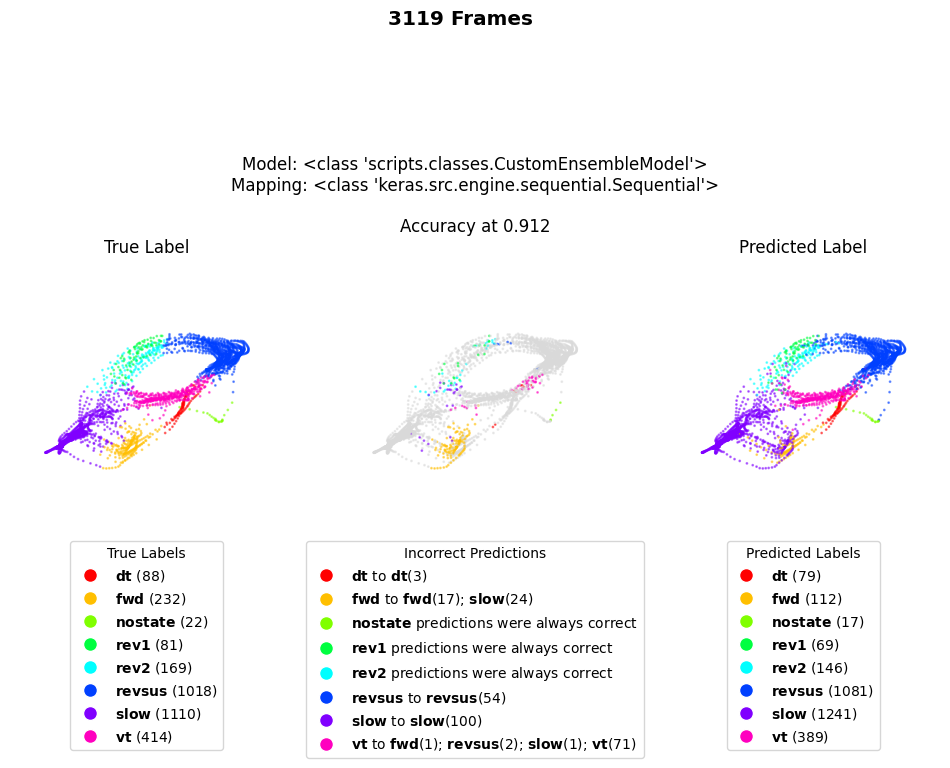

Some points 15 used for accuracy calculation of the model are not plotted, since the mapping does not include them.


True

In [3]:
# Creating a Visualizer (BundleNet) from the data but still using the Logistic Regression as a prediction model in the plots.
%matplotlib inline
vs = data.createVisualizer(epochs=2000, l_dim=3, use_predictor=False)
vs.make_comparison(quivers=False, show_legend=True)

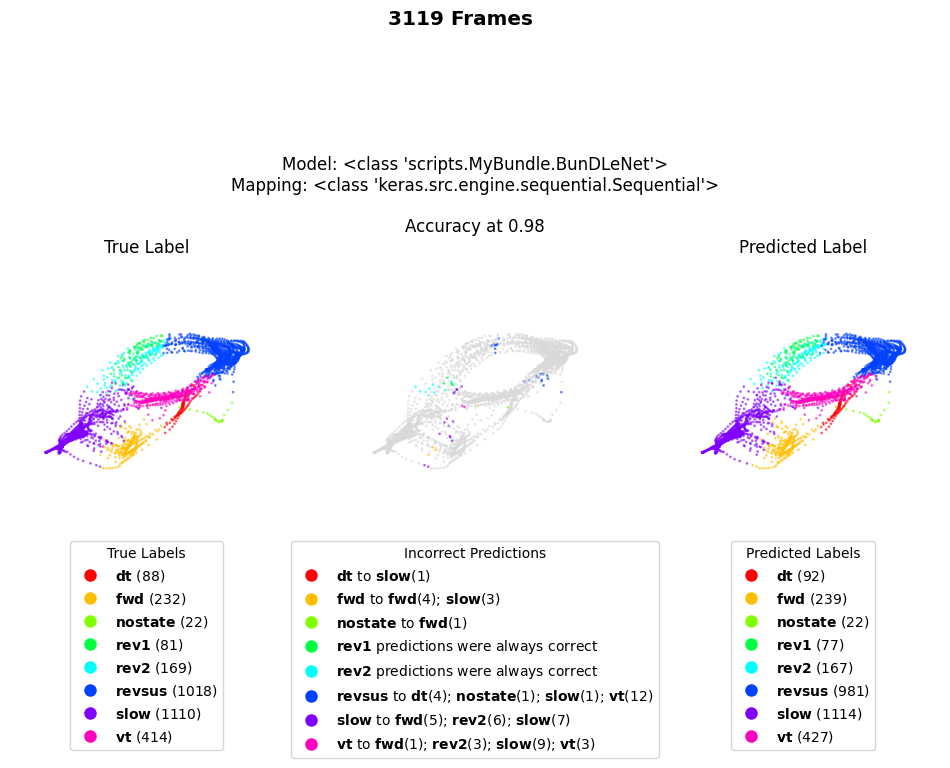

True

In [4]:
# Change to using the BundleNEt Predictor in the plots.
vs.useBundlePredictor()
vs.make_comparison(quivers=False, show_legend=True)

This does mean that the BundleNet Predictor (accuracy = 0.98) seems to be a lot better than the simple Logistic Regression (accuracy = 0.912), for predicting behavior. Keep in mind tough that the accuracy on the plots is calculated only by the points shown (without first 15 points), however in this case the accuracy of the Logistic Regression is not higher with these points added as we see above (accuracy = 0.912252712188896).

In [5]:
# I am creating a Visualizer with a 20-dimensional latent space 
vs2 = data.createVisualizer(epochs=2000, l_dim=20, use_predictor=True)

Losses 0.002314 0.000011 0.002325: 100%|██████████| 2000/2000 [01:59<00:00, 16.80it/s]


Points have coordinate shape:  (3119, 20)


X (20, 3119)
Y (3119,)
Y-names (8,)
X-names (20,)


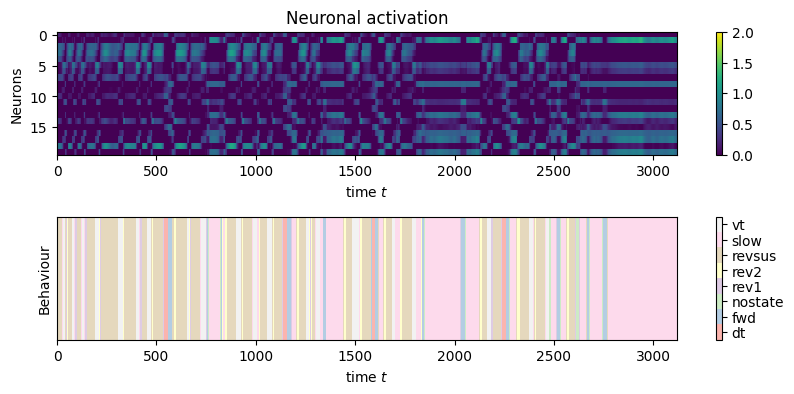

Accuracy: 0.9868547611413915
Probability map has shape: (3119, 28)
HAVE mapping MODEL
Points have coordinate shape:  (3119, 3)


In [6]:
# This Visualizer is used to create a new Data-object, where I fit a Logistic Regression
newdata = vs2.use_latent_dim_as_input()
newdata.plotting_neuronal_behavioural()
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
newdata.fit_model(logreg, binary=True)

newvs = newdata.createVisualizer(PCA(n_components=3))

0.05  or  0.10170152
0.05  or  0.10170152
0.05  or  0.10170152


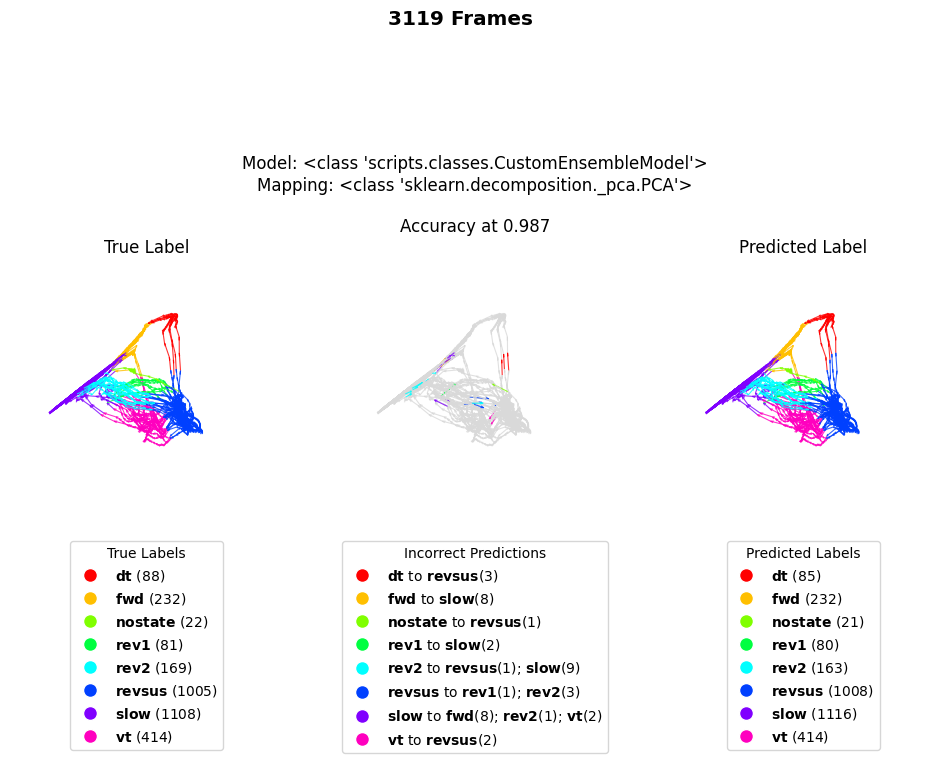

True

In [7]:
# Here I am plotting the new BundleNet with the Logistic Regression
%matplotlib inline
newvs.make_comparison(show_legend=True)

HAVE mapping MODEL
Points have coordinate shape:  (3134, 3)
0.05  or  0.08818631669479775
0.05  or  0.08818631669479775
0.05  or  0.08818631669479775


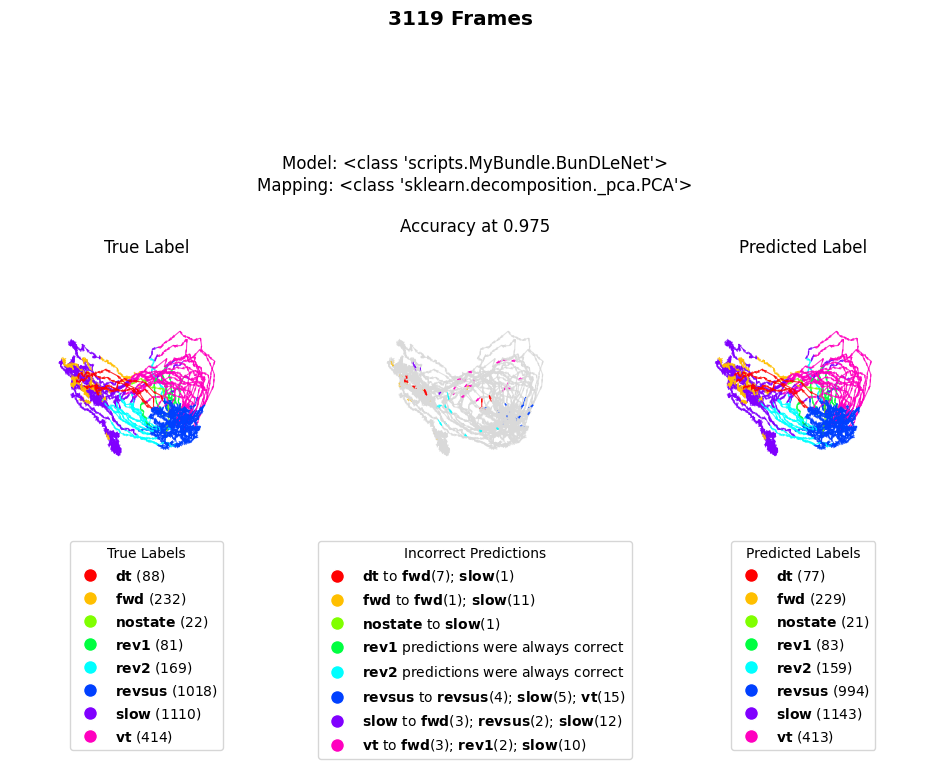

The prediction has fewer points than the true labels. Therefore 15 points are not plotted and also not used for accuracy calculation of the model
HAVE mapping MODEL
Points have coordinate shape:  (3134, 3)


True

In [8]:
# Here I am plotting the older 20-dimensional BundleNet using PCA, to see its accuracy
vs2.change_mapping(PCA(n_components=3))
vs2.useBundlePredictor()
vs2.make_comparison(show_legend=True)

Does this mean that the simple Logistic regression is better than the Predictor in the BundleNet? Since they are both using the same input to predict the labels and the Logistic Regression has accuracy of 0.987 while the Predictor only has 0.975.

Could this be due to the fact that the BundleNet is trained with the true labels already and adds some more info in the 20-dimensional dataset? The Logistic Regression picks up on these?

No. I do not think so since the data for the Predictor is the same as already mentioned.

In [ ]:
print(newvs.bundle_tau)


In [ ]:
# Assuming 'A' and 'B' are encoded as strings in your 'Y' variable
b_neurons = [
		'AVAR',
		'AVAL',
		'SMDVR',
		'SMDVL',
		'SMDDR',
		'SMDDL',
		'RIBR',
		'RIBL'
	]

worm_num = 0

matlab = Loader(worm_num)
data = Database(*matlab.data)
data.exclude_neurons(b_neurons)


In [ ]:
# Looking at data
%matplotlib inline
#%matplotlib notebook
data.plotting_neuronal_behavioural()
#data._behavior()
#data._neurons()

# Adding prediction Model & Cluster BPT
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
data.fit_model(logreg, binary=True)
#data.cluster_BPT(nrep=2, max_clusters=3, plot_markov=True)


In [ ]:
vs = Visualizer(data, None)

%matplotlib inline
vs.plot_mapping()
%matplotlib notebook
vs.make_movie()



In [ ]:
vs1 = Visualizer(data, None)

vs.attachBundleNet(epochs=3000, l_dim=3)
vs1.attachBundleNet(epochs=3000, l_dim=30)

In [ ]:
new_data = vs.use_latent_dim_as_input()
new_data1 = vs1.use_latent_dim_as_input()


In [ ]:
new_data.plotting_neuronal_behavioural()
new_data1.plotting_neuronal_behavioural()


In [ ]:
# Adding prediction Model & Cluster BPT
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
new_data.fit_model(logreg, binary=True)
new_data1.fit_model(logreg, binary=True)

%matplotlib inline
new_data.cluster_BPT(nrep=5, max_clusters=20, plot_markov=True)
new_data1.cluster_BPT(nrep=5, max_clusters=20, plot_markov=True)


In [ ]:
%matplotlib inline
new_data.behavioral_state_diagram(cog_stat_num=2, adj_matrix=True, save=False)
data.behavioral_state_diagram(cog_stat_num=2, adj_matrix=True, save=False)
new_data.step_plot(clusters=5)

In [ ]:
# Adding prediction Model & Cluster BPT
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
data.fit_model(logreg, binary=True)
%matplotlib inline

data.cluster_BPT(nrep=3, max_clusters=20, plot_markov=True)


In [ ]:
# Do some cool plots
print(list(data.xc[:, 5, 0].astype(int)))
%matplotlib inline
data.behavioral_state_diagram(cog_stat_num=2, adj_matrix=True, save=False)
data.step_plot(clusters=5)


In [ ]:
# Add a mapping to create a 3D Visualizer
vs = data.createVisualizer(PCA(n_components=3))


In [ ]:
%matplotlib inline
vs.plot_mapping(show_legend=False, grid_off=True, quivers=True, show=True)
%matplotlib notebook
vs.make_comparison(show_legend=True, quivers=False)


In [ ]:
%matplotlib notebook
vs.make_movie(interval=100, save=False, show_legend=True, grid_off=True, quivers=False)

In [ ]:
# Attach a BundleNet to use tau for mapping into 3D space
vs.attachBundleNet(epochs=1000)


In [ ]:
%matplotlib inline
vs.plot_mapping(show_legend=False, grid_off=True, quivers=True, show=True)
vs.make_comparison(show_legend=True, quivers=True)


In [ ]:
%matplotlib notebook
vs.make_movie(interval=100, save=False, show_legend=True, grid_off=True, quivers=False)


In [ ]:
vs.change_mapping(TSNE(n_components=3))

In [ ]:
%matplotlib inline
vs.plot_mapping(show_legend=False, grid_off=True, quivers=True, show=True)
vs.make_comparison(show_legend=True, quivers=True)


In [ ]:
# Skip if already in dir
import os
os.chdir('..')
print(os.getcwd())


In [ ]:
### LOADING PICKLES ###
import pickle
from scripts.classes import *
print(os.getcwd())

%matplotlib inline

# Load the pickled data back into a Python object
data = []
for i in range(5):
	with open(f'data/pickles/data_worm_{i + 1}_8D.pkl', 'rb') as file:
		loaded_data = pickle.load(file)
		loaded_data.step_plot()
		vs = loaded_data.createVisualizer()
		vs.behavioral_state_diagram()
		data.append(loaded_data.p_markov)
#loaded_data.plot_markov()

data = np.asarray(data)
data = data.mean(axis=2)